<a href="https://colab.research.google.com/github/RegaipKURT/Advanced_AI_with_PYTHON/blob/master/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GENERATIVE ADVERSERIAL NETWORK (GAN) 
# ÜRETKEN ÇEKİŞMELİ AĞLAR

**GAN NEDİR?**

GAN bir yapay sinir ağı mimarisidir. Aslında iki ayrı ağ yapısının bir araya gelmesiyle oluşur. GAN'lar kendisine verilen veriseti ile aynı istatistiklere sahip olan yeni veriler oluşturur. 

GAN iki ayrı ağdan oluşur demiştik. Bu iki ayrı ağdan birisi gerçek verileri alır ve bir denetleyici yapıya gönderir. İkinci ağ yapısı ise orjinal veriyi temsil etmesi gereken başka bir veri oluşturur ve bu veriyi yine aynı denetleyici yapıya gönderir. Denetleyici ağ veya yapı kısmında ise bu veriler test edilir ve ortaya çıkan verilerin sonucunda taklitçi yapıdan gelen verilerin orjinal veriye ne kadar benzediği ölçülür. Taklitçi ağ yapısı eğer yeterince başarılı olamamışsa ağırlıklarını güncelleyerek yeni bir veri oluşturmaya çalışır. Sonuç olarak taklit eden ağın ağırlıkları belirli bir yerden sonra güncellenmiş olur ve orjinal veriye çok benzeyen veya orjinal veriyi iyi temsil eden bir veriseti oluşturmayı öğrenmiş  olur. 

Yani ağlardan bir tanesi orjinal veriyi kullanırken diğeri de aynı veriyi taklit etmeye çalışır. Her iki ağ da denetleyici yapıya kendi verisinin orjinal olduğunu kanıtlamaya çalışırken, taklitçi ağımız orjinal veriyi sıfırdan kendisi oluşturabilecek hale gelir.

Bu durumu bir resimle temsil edersek şöyle görünecektir:

![alt text](https://miro.medium.com/max/958/1*-gFsbymY9oJUQJ-A3GTfeg.png)

Resim Kaynağı: https://medium.com/@devnag/generative-adversarial-networks-gans-in-50-lines-of-code-pytorch-e81b79659e3f

**ÖRNEK BİR GAN YAPISI**
![alt text](https://miro.medium.com/max/1741/1*t78gwhhw-hn1CgXc1K89wA.png)

Resim Kaynağı: https://medium.com/datadriveninvestor/generative-adversarial-network-gan-using-keras-ce1c05cfdfd3

**EPOCH ARTTIKÇA ÖĞRENMENİN GELİŞİMİ**
![alt text](https://miro.medium.com/max/1952/1*xm6_ZfvfKSHe2KS49DT8TQ.png)


Resim Kaynağı: https://medium.com/datadriveninvestor/generative-adversarial-network-gan-using-keras-ce1c05cfdfd3

Bütün bu yapının sonucunda nihai amacımız yeni veri üretmektir. Üretilen yeni veri gerçeğine ne kadar benziyorsa ağımız o kadar başırılı olmuş demektir. İyi bir yapıda ürettiğimiz yeni veriler gerçeğinden ayırt edilemeyecek kadar kalitelidir. 

Örnek olarak GANs ile üretilmiş aslında gerçekte hiç olmayan insan yüzlerine bakalım:

![alt text](https://cdn.vox-cdn.com/thumbor/CMJs1AJyAmf27RUd2UI5WBSZpy4=/0x0:3049x2048/920x613/filters:focal(1333x1562:1819x2048):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/63058104/fake_ai_faces.0.png)

Resim Kaynağı: https://www.theverge.com/tldr/2019/2/15/18226005/ai-generated-fake-people-portraits-thispersondoesnotexist-stylegan

# GAN MİMARİSİNİN KODLANMASI
Nasıl çalıştığını anladıysak örnek bir GAN mimarisi kurmaya başlayabilşiriz.

**Kütüphanelerin Yüklenmesi**

In [1]:
from keras.layers import Dense, Dropout, ReLU
from keras.models import Sequential, Model, Input
from keras.optimizers import Adam
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
import warnings
warnings.filterwarnings("ignore")

Verinin Yüklenmesi

11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)


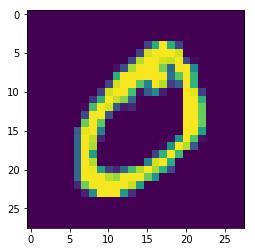

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = (x_train.astype(np.float32()-127.5))/127.5
plt.imshow(x_train[1])
print(x_train.shape)

In [4]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
print(x_train.shape)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
print(x_test.shape)

(60000, 784)
(10000, 784)


**Model Kurma**

GANs modeli Generator ve Discriminator olmak üzere iki ağdan oluşur. Bu ağları ayrı ayrı kurup daha sonra genel modeli mizi oluşturacağız.

Generator ağ oluşturmak için fonksiyonumuzu yazalım.

In [7]:
def create_generator():
    generator = Sequential()
    generator.add(Dense(512, input_dim=100))
    generator.add(ReLU())

    generator.add(Dense(1024))
    generator.add(ReLU())

    generator.add(Dense(512))
    generator.add(ReLU())

    #çıktı boyutlarını verimizle uyumlu olacak şekilde 784 olarak ayarlayalım
    generator.add(Dense(784, activation="tanh"))


    #sahte ve gerçek iki sınıf olacağı için classification yapar gibi modelimizi kuracağız.
    generator.compile(loss="binary_crossentropy", optimizer=Adam(lr=0.001, beta_1 = 0.5))
    return generator

g = create_generator()
g.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               51712     
_________________________________________________________________
re_lu_4 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              525312    
_________________________________________________________________
re_lu_5 (ReLU)               (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
re_lu_6 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 784)              

Şimdi de Discriminator ağımızın olacağı kısmı yazalım.

Fakat burada anlaşılması gereken kısım Discriminator ağın input shape'i alacağı resimlere uygun olmalıdır. Çünkü bu ağa resimleri direkt olarak vereceğiz, generator gibi kendisi üretmeyecek.

In [9]:
def create_discriminator():
    discriminator = Sequential()
    discriminator.add(Dense(1024, input_dim=784))
    discriminator.add(ReLU())
    discriminator.add(Dropout(0.4))
    
    discriminator.add(Dense(512))
    discriminator.add(ReLU())
    discriminator.add(Dropout(0.4))

    discriminator.add(Dense(512))
    discriminator.add(ReLU())

    discriminator.add(Dense(1, activation="sigmoid"))

    discriminator.compile(loss="binary_crossentropy", optimizer=Adam(lr=0.001, beta_1=0.5))

    return discriminator

d = create_discriminator()
d.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1024)              803840    
_________________________________________________________________
re_lu_10 (ReLU)              (None, 1024)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               524800    
_________________________________________________________________
re_lu_11 (ReLU)              (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)              

**GAN MODELİNİN OLUŞTURULMASI**

Generator ve Discriminator ağlarımızı oluşturduktan sonra artık tek bir yapıda birleştirip GAN modelimizi oluşturabiliriz.

Başlamadan önce bilmeliyiz ki, generator kısmının, yani ağımızın üretici olan kısmının, kendisini güncelleyebilmesi için discriminator kısmını geliştirmek istemiyoruz. Çünkü eğer fake/real ayrımını yapacak olan discriminator kısmını da eğitirsek ağın bu kısmı da kendini geliştireceği için, oluşturulan sahte veri ne kadar gerçekçi olursa olsun bu verinin sahte olduğunu anlayacak ve generator kısmı hep başarısız olacaktır. Dolayısıyla üretici ağ her çıktısını başarısız görecek ve kendini geliştirmekte zorlanacaktır. Oysa ki gerçeğe yaklaştığında başarılı olduğunu bilmesi ve kendini buna göre güncellemesi gerekiyor. Bu sebeplerden dolayı discriminator ağımız eğitime kapalı olacak.

In [10]:
def create_gan(generator, discriminator):
    discriminator.trainable = False

    #şimdi bir input belirleyip generator'a vermekle başlayalım.
    gan_input = Input(shape=(100,))
    #generator bu kısmı aldıktan sonra bize bir değer verecek.
    x = generator(gan_input)
    #aldığımız değer discriminator'a girip denetlenecek ve bize bir GAN outputu dönderecek
    gan_output = discriminator(x)

    #artık bir gan modeli kurabiliriz.
    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss="binary_crossentropy", optimizer="adam")

    #sonuç olarak gan modelimizi döndürelim
    return gan

gan = create_gan(g, d)
g.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               51712     
_________________________________________________________________
re_lu_4 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              525312    
_________________________________________________________________
re_lu_5 (ReLU)               (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
re_lu_6 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 784)              

**GAN Modelinin Eğitilmesi**

In [30]:
epochs = 50
batch_size = 256
def gan_train(g, d, gan):
    print("Devam eden epoch : 1")
    for e in range(epochs):
        if (e+1)%5 == 0:
            print("Devam eden epoch : ", e+1)
        for _ in range(batch_size):
            noise = np.random.normal(0,1,[batch_size, 100])
            generated_img = g.predict(noise)
            
            batch_img = x_train[np.random.randint(low=0, high=x_train.shape[0], size=batch_size)]
            
            x = np.concatenate([batch_img, generated_img])


            y_disc = np.zeros(batch_size*2)
            y_disc[:batch_size] = 1

            d.trainable = True
            d.train_on_batch(x, y_disc)

            noise = np.random.normal(0,1,[batch_size, 100])
            y_gen = np.ones(batch_size)

            d.trainable = False

            gan.train_on_batch(noise, y_gen)
        
    print("Eğitim Tamamlandı...")
gan_train(g,d,gan)

Devam eden epoch : 1
Devam eden epoch :  5
Devam eden epoch :  10
Devam eden epoch :  15
Devam eden epoch :  20
Devam eden epoch :  25
Devam eden epoch :  30
Devam eden epoch :  35
Devam eden epoch :  40
Devam eden epoch :  45
Devam eden epoch :  50
Eğitim Tamamlandı...


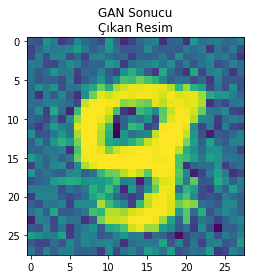

In [36]:
noise = np.random.normal(loc=0, scale=1, size=[100,100])
generated_images = g.predict(noise)
generated_images = generated_images.reshape(100,28,28)
plt.imshow(generated_images[66], interpolation="nearest")
plt.title("GAN Sonucu\nÇıkan Resim")
plt.show()